In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_hdf('../input/tram.train.h5')
df_test = pd.read_hdf('../input/tram.test.h5') #zbiór testowy bez odpowiedzi

df = pd.concat([df_train, df_test])

print(df_train.shape)
print(df.shape)

df.sample(10)

(175986, 11)
(308152, 11)


,id,delay,datetime,stop,stop_name,number,direction,planned_time,vehicle_id,trip_id,seq_num
56744,56744,NaN,NaN,630,Bieżanowska,13,Nowy Bieżanów P+R,2018-07-24 08:42:00,6.352185e+18,6351558574044674564,21.0
213441,213441,120.0,2018-07-27 19:48:11,3036,Szpital Narutowicza,18,Czerwone Maki P+R,2018-07-27 19:46:00,6.352185e+18,6351558574046633233,3.0
53762,53762,NaN,NaN,571,Korona,10,Łagiewniki,2018-07-24 07:41:00,6.352185e+18,6351558574044633604,24.0
10203,10203,60.0,2018-07-23 09:30:56,930,M1 Al. Pokoju,22,Walcownia,2018-07-23 09:29:00,6.352185e+18,6351558574044903685,25.0
41683,41683,0.0,2018-07-23 20:31:18,83,Urzędnicza,4,Bronowice Małe,2018-07-23 20:31:00,6.352185e+18,6351558574044489997,26.0
86429,86429,NaN,NaN,3041,Rondo 308. Dywizjonu,1,Wzgórza K.,2018-07-24 19:55:00,6.352185e+18,6351558574044391950,18.0
232984,232984,0.0,2018-07-30 10:22:42,571,Korona,6,Salwator,2018-07-30 10:22:00,6.352185e+18,6351558574044508168,12.0
232126,232126,0.0,2018-07-30 09:58:57,84,Biprostal,4,Wzgórza K.,2018-07-30 09:58:00,6.352185e+18,6351558574044479493,7.0
206994,206994,120.0,2018-07-27 17:01:39,129,Cystersów,52,Os.Piastów,2018-07-27 16:59:00,6.352185e+18,6351558574046874891,20.0
198312,198312,60.0,2018-07-27 13:21:15,577,Słomiana,52,Czerwone Maki P+R,2018-07-27 13:20:00,6.352185e+18,6351558574046870791,27.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308152 entries, 0 to 308145
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            308152 non-null  int64  
 1   delay         175986 non-null  float64
 2   datetime      175986 non-null  object 
 3   stop          308152 non-null  int64  
 4   stop_name     308152 non-null  object 
 5   number        308152 non-null  int64  
 6   direction     308152 non-null  object 
 7   planned_time  308152 non-null  object 
 8   vehicle_id    308152 non-null  float64
 9   trip_id       308152 non-null  int64  
 10  seq_num       305770 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 28.2+ MB


### delay variable
#### Let's start with exploring the target variable, which in this case is delay of trams.
First of all the delay is represented in seconds, while actually this should be minutes. (values are 0, 60, 120, ...)

Secondly when we compare planned time to actual arrival (datetime), we can see that delay wasn't calculated accurately. 
Seconds weren't taken into calculations. 

This leads to situation where for example time difference between 18:24:00 and 18:24:59 is 0sec. but 18:24:00 and 18:25:01 is 60sec. while both delays are almost identical.

values of delay present in data set


array([   0,   60,  120,  180,  240,  300,  360,  420,  540,  480,  600,
       1140,  660,  720,  780,  840,  960])

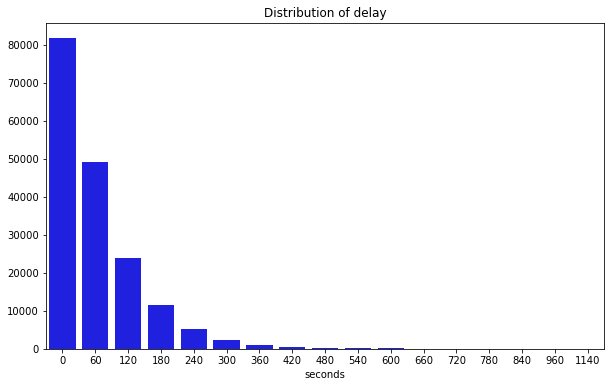

In [13]:
print('values of delay present in data set')
display(df_train['delay'].unique())
g = df_train['delay'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=g.index, y=g, color='blue');
plt.title('Distribution of delay');
plt.xlabel('seconds');
plt.ylabel('');

In [3]:
df['delay_min'] = df['delay'] / 60
df['planned_time'] = pd.to_datetime(df['planned_time'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['delay_sec'] = (df['datetime'] - df['planned_time'])/np.timedelta64(1,'s')
df.loc[df['delay_sec']<0, 'delay_sec'] = 0

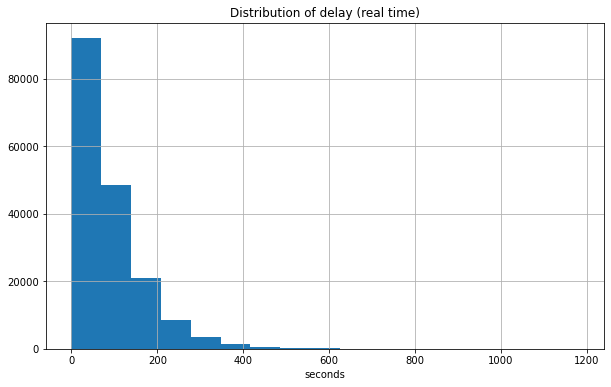

In [7]:
plt.figure(figsize=(10,6))
df['delay_sec'].hist(bins=17);
plt.title('Distribution of delay (real time)');
plt.xlabel('seconds');

### stop and stop_name
Both features describe the same thing - the tram stop. Stop is number of tram's stop and stop_name it's name.

In [5]:
print('we have {} stops (number) and {} stops (name)'.format(df['stop'].nunique(), df['stop_name'].nunique()))
df.groupby(['stop', 'stop_name']).size().sort_values(ascending=False)

we have 154 stops (number) and 154 stops (name)


stop  stop_name            
125   Rondo Mogilskie          6766
131   Dworzec Główny           6699
359   Stradom                  5062
365   Rondo Grzegórzeckie      5004
624   Kabel                    4800
                               ... 
462   Agencja Kraków Wschód     149
128   Rakowicka                 109
449   Bardosa                    65
450   Kopiec Wandy               45
466   PH                          1
Length: 154, dtype: int64

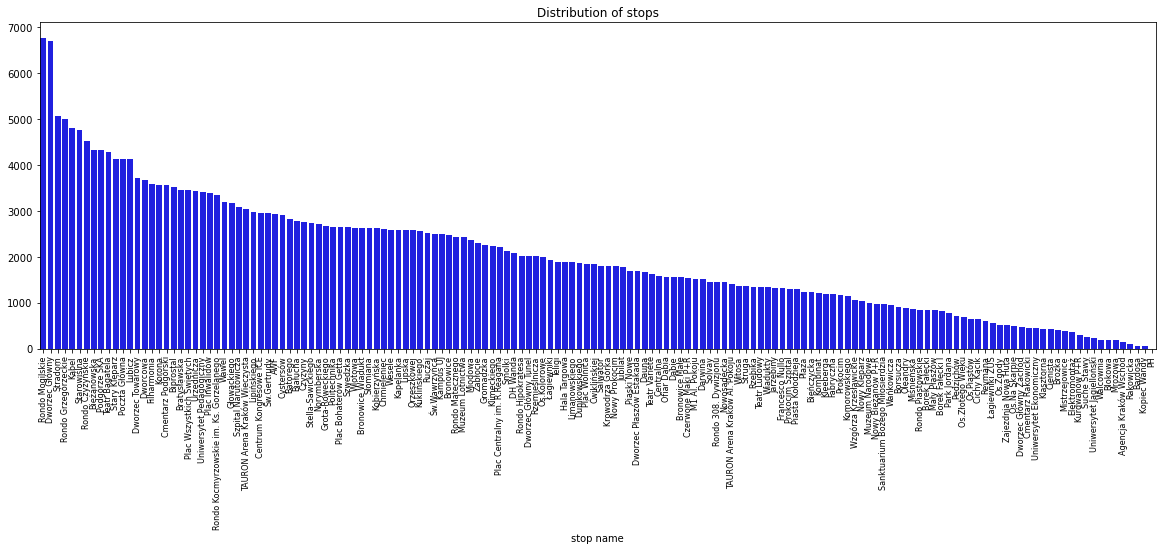

In [44]:
g = df['stop_name'].value_counts()
plt.figure(figsize=(20,6))
sns.barplot(x=g.index, y=g, color='blue');
plt.title('Distribution of stops');
plt.xticks(rotation=90, fontsize=8);
plt.xlabel('stop name');
plt.ylabel('');

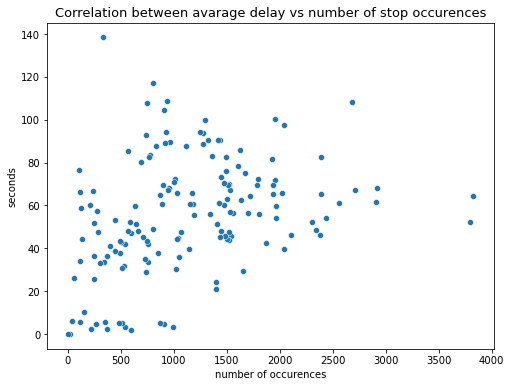

In [12]:
df_stop = df.groupby('stop_name')['delay'].agg(['mean', 'count']).sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(8, 6));
sns.scatterplot(x='count', y='mean', data=df_stop);
plt.title('Correlation between avarage delay vs number of stop occurences', fontsize=13);
plt.ylabel('seconds');
plt.xlabel('number of occurences');

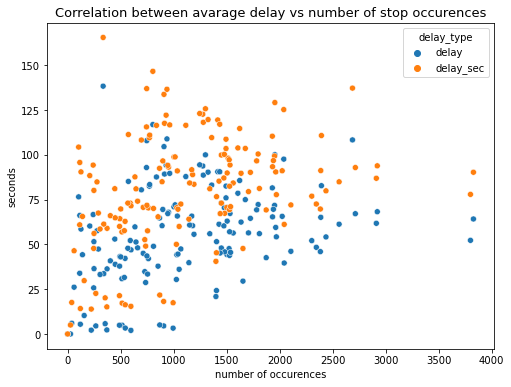

In [14]:
df_stop2 = df.groupby('stop_name')[['delay', 'delay_sec']].agg(['mean', 'count']).reset_index()
df_stop2.columns=['stop_name', 'delay', 'count', 'delay_sec', 'count2']

df_stop2 = pd.melt(df_stop2, id_vars=['stop_name', 'count'], value_vars=['delay', 'delay_sec'], var_name='delay_type', value_name='mean')
plt.figure(figsize=(8, 6));
sns.scatterplot(x='count', y='mean', data=df_stop2, hue='delay_type');
plt.title('Correlation between avarage delay vs number of stop occurences', fontsize=13);
plt.ylabel('seconds');
plt.xlabel('number of occurences');


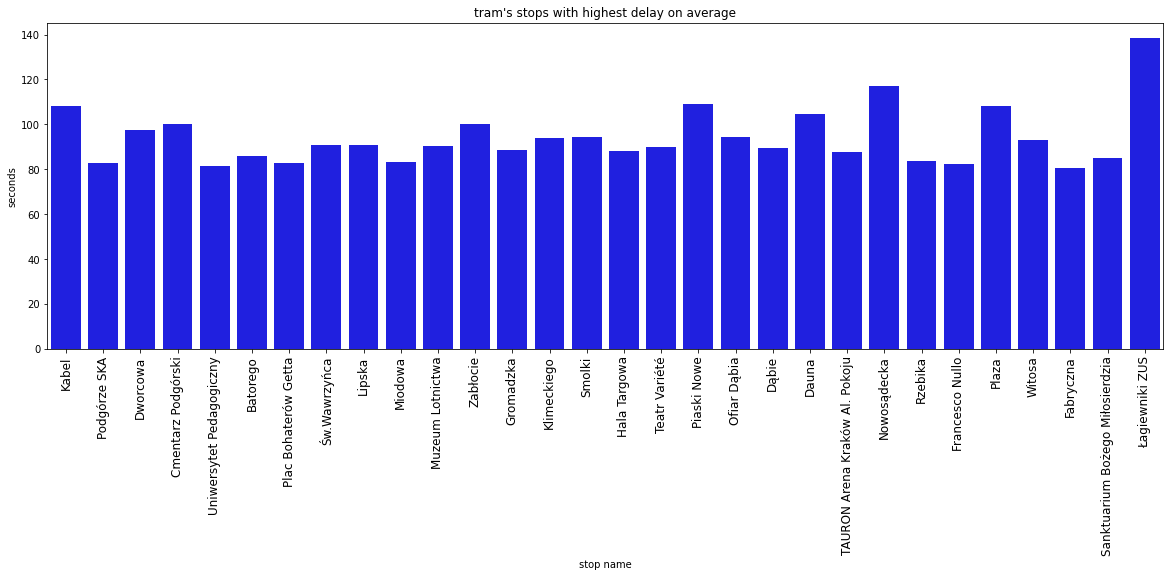

In [47]:

plt.figure(figsize=(20,6))
sns.barplot(x='stop_name', y='mean', data=df_stop[df_stop['mean']>80], color='blue');
plt.title('tram\'s stops with highest delay on average');
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('stop name');
plt.ylabel('seconds');

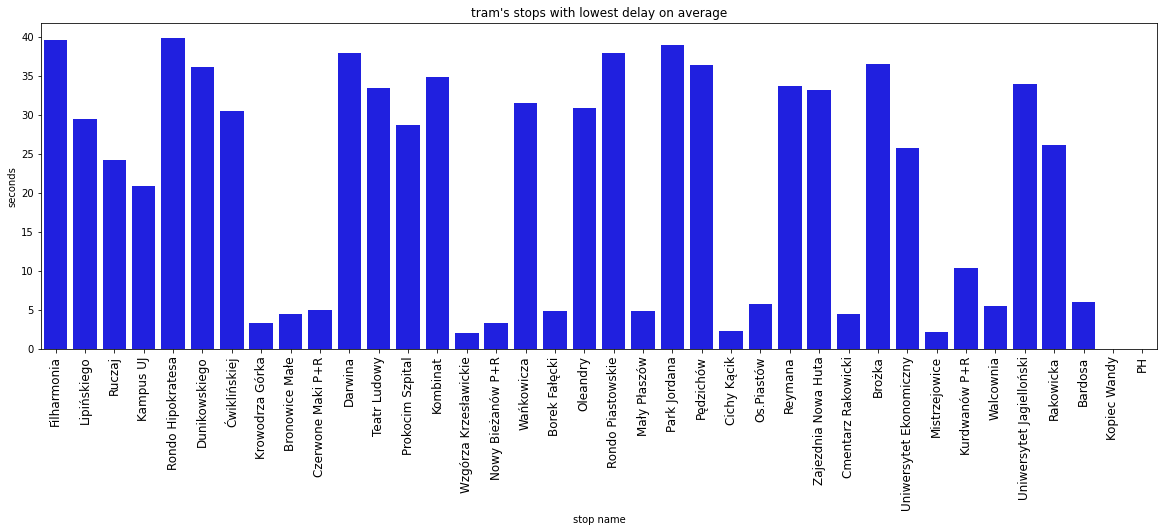

In [49]:
plt.figure(figsize=(20,6))
sns.barplot(x='stop_name', y='mean', data=df_stop[df_stop['mean']<40], color='blue');
plt.title('tram\'s stops with lowest delay on average');
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('stop name');
plt.ylabel('seconds');

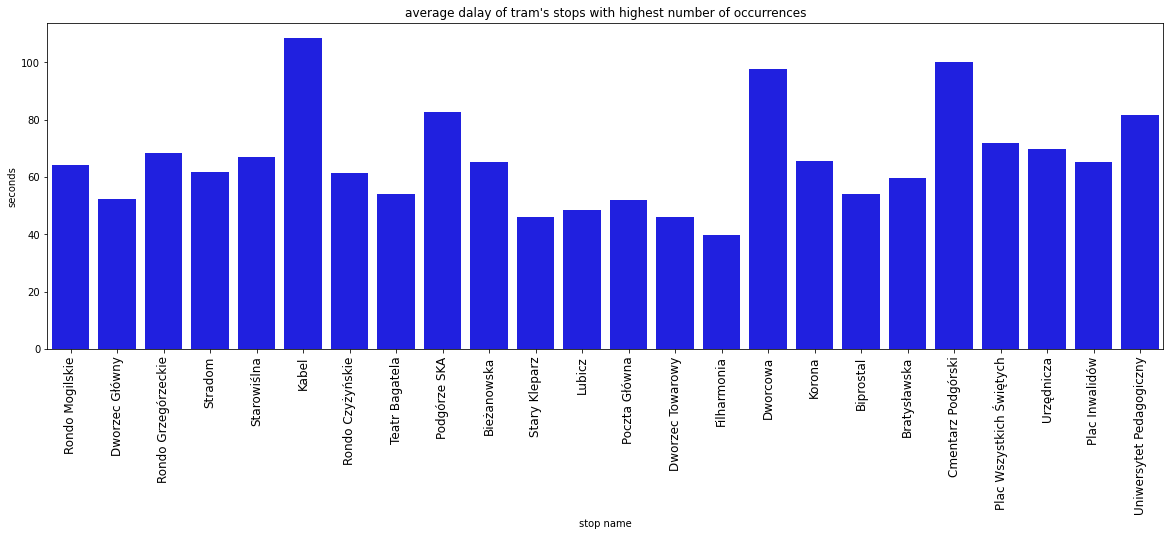

In [10]:
plt.figure(figsize=(20,6))
sns.barplot(x='stop_name', y='mean', data=df_stop[df_stop['count']>1900], color='blue');
plt.title('average dalay of tram\'s stops with highest number of occurrences');
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('stop name');
plt.ylabel('seconds');

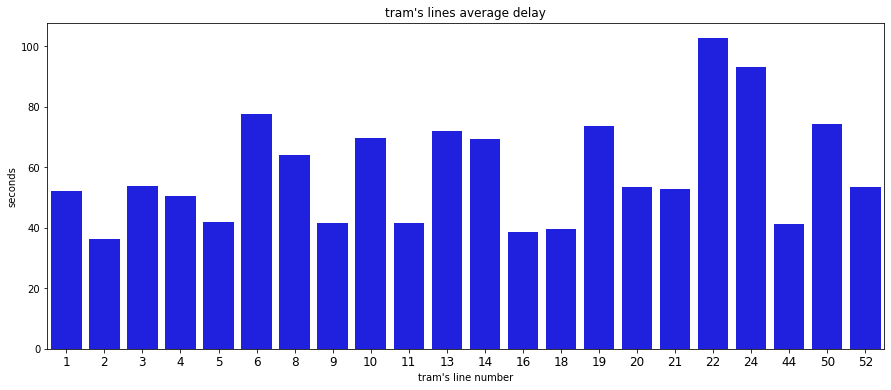

In [15]:
df_number = df.groupby('number')['delay'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()
plt.figure(figsize=(15,6))
sns.barplot(x='number', y='mean', data=df_number, color='blue');
plt.title('tram\'s lines average delay');
plt.xticks( fontsize=12);
plt.xlabel('tram\'s line number');
plt.ylabel('seconds');

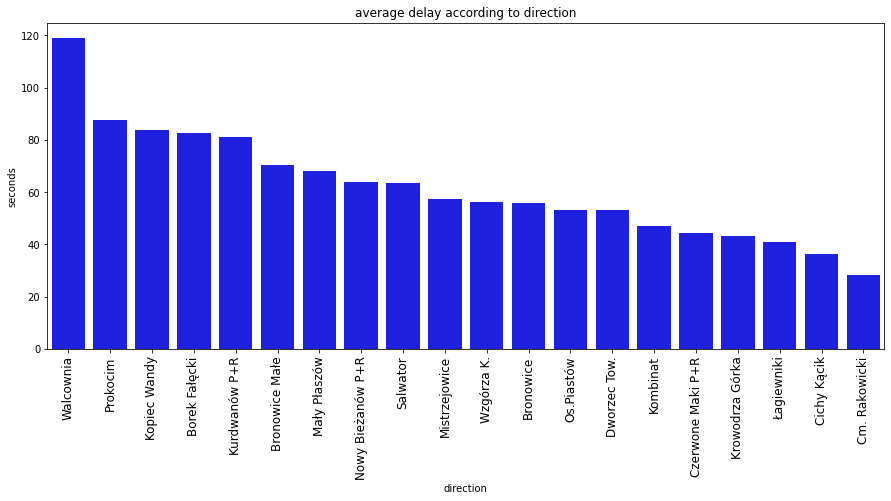

In [17]:
df_direct = df.groupby('direction')['delay'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()
plt.figure(figsize=(15,6))
sns.barplot(x='direction', y='mean', data=df_direct, color='blue');
plt.title('average delay according to direction');
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('direction');
plt.ylabel('seconds');

In [23]:
df['vehicle_id'].value_counts()

6.352185e+18    154863
6.352185e+18    153289
Name: vehicle_id, dtype: int64

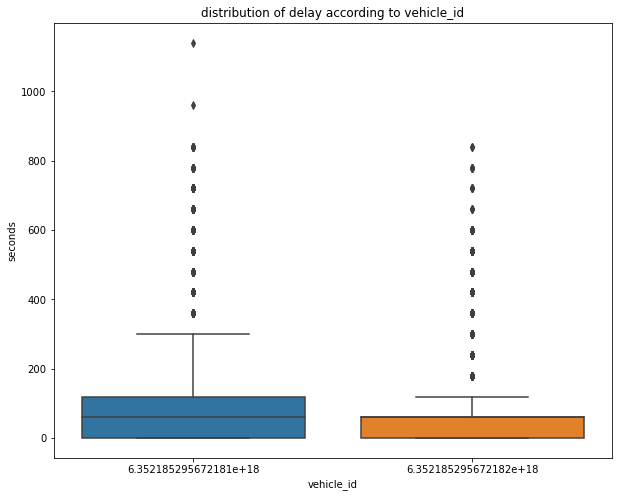

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(x='vehicle_id', y='delay', data=df_train);
plt.title('distribution of delay according to vehicle_id');
plt.xlabel('vehicle_id');
plt.ylabel('seconds');

In [20]:
df[df['seq_num'].isnull()]

,id,delay,datetime,stop,stop_name,number,direction,planned_time,vehicle_id,trip_id,seq_num,delay_min,delay_sec
9945,9945,0.0,2018-07-23 09:25:32,1049,Głowackiego,44,Kombinat,2018-07-23 09:25:00,6.352185e+18,6351558574044981509,NaN,0.0,32.0
10097,10097,0.0,2018-07-23 09:28:38,84,Biprostal,44,Kombinat,2018-07-23 09:28:00,6.352185e+18,6351558574044981509,NaN,0.0,38.0
10142,10142,0.0,2018-07-23 09:29:36,83,Urzędnicza,44,Kombinat,2018-07-23 09:29:00,6.352185e+18,6351558574044981509,NaN,0.0,36.0
10456,10456,60.0,2018-07-23 09:35:59,77,Teatr Bagatela,44,Kombinat,2018-07-23 09:34:00,6.352185e+18,6351558574044981509,NaN,1.0,119.0
10546,10546,0.0,2018-07-23 09:37:50,3032,Stary Kleparz,44,Kombinat,2018-07-23 09:37:00,6.352185e+18,6351558574044981509,NaN,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307661,307661,NaN,NaT,113,AWF,4,Kombinat,2018-07-31 23:07:00,6.352185e+18,6351558574044471567,NaN,NaN,NaN
307699,307699,NaN,NaT,407,Czyżyny,4,Kombinat,2018-07-31 23:09:00,6.352185e+18,6351558574044471567,NaN,NaN,NaN
307735,307735,NaN,NaT,408,Rondo Czyżyńskie,4,Kombinat,2018-07-31 23:12:00,6.352185e+18,6351558574044471567,NaN,NaN,NaN
307766,307766,NaN,NaT,413,Os.Kolorowe,4,Kombinat,2018-07-31 23:13:00,6.352185e+18,6351558574044471567,NaN,NaN,NaN


##### missing seq_num
Some lines have missing seq_num values for some directions (mainly Dworzec Tow. and Kombinat).

Routes of this directions cover stops in other directions of the same line number. Only for pairs 6 - Kurdwanów and 21 - Piastów these stops are completly new.

In [9]:
print('number of missing values fro seq_num:')
df[df['seq_num'].isnull()].groupby(['number', 'direction']).size()

number of missing values fro seq_num:


number  direction    
3       Dworzec Tow.     968
4       Kombinat         231
6       Kurdwanów P+R     23
21      Kombinat          11
        Os.Piastów         2
22      Kombinat         427
44      Kombinat         720
dtype: int64

In [8]:
numbers = [3, 4, 6, 21, 22, 44]
df[df['number'].isin(numbers)].groupby(['number', 'direction'])[['number', 'direction']].size()

number  direction        
3       Dworzec Tow.          968
        Krowodrza Górka      8508
        Nowy Bieżanów P+R    8787
4       Bronowice Małe       8535
        Kombinat              231
        Wzgórza K.           8948
6       Kurdwanów P+R        5186
        Salwator             5630
21      Kombinat               11
        Kopiec Wandy          679
        Os.Piastów            533
22      Borek Fałęcki        6683
        Kombinat              427
        Walcownia            6276
44      Bronowice            2092
        Kombinat              720
        Kopiec Wandy         1670
dtype: int64

In [9]:
def replace_seq_num(number, direction_nan, direction):
    mask2 = (df['number']==number) & (df['direction']==direction)
    df_t = df[mask2].groupby('stop_name')['seq_num'].max().reset_index()
    for stop in df_t['stop_name'].unique():
        mask1 = (df['number']==number) & (df['direction']==direction_nan) & (df['stop_name']==stop)
        df.loc[mask1 & (df.seq_num.isnull()) , 'seq_num'] = df_t.loc[df_t['stop_name']==stop, 'seq_num'].values[0]

replace_seq_num(3, 'Dworzec Tow.', 'Krowodrza Górka')
replace_seq_num(4, 'Kombinat', 'Wzgórza K.')
replace_seq_num(21, 'Kombinat', 'Kopiec Wandy')
replace_seq_num(22, 'Kombinat', 'Walcownia')
replace_seq_num(44, 'Kombinat', 'Kopiec Wandy')

df['seq_num'] = df['seq_num'].fillna(-1)

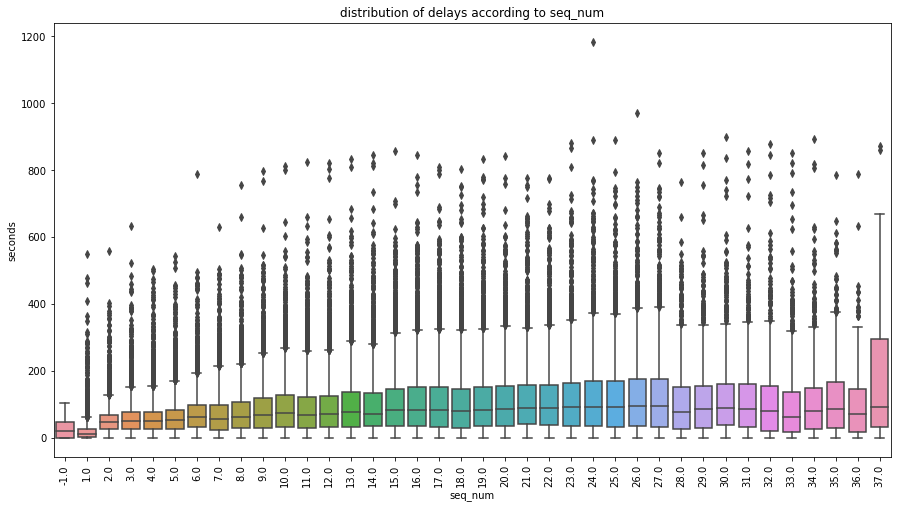

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='seq_num', y='delay_sec', data=df);
plt.title('distribution of delays according to seq_num');
plt.xticks(rotation=90);
plt.ylabel('seconds');

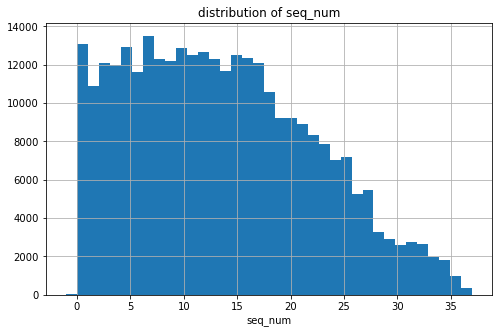

In [13]:
plt.figure(figsize=(8,5));
df['seq_num'].hist(bins=37);
plt.title('distribution of seq_num');
plt.xlabel('seq_num');

#### Time
From planned_time extract hour and weekday fro further analysis of delays depending on day of week and hour.

In [6]:
df['hour'] = df['planned_time'].dt.hour
df['weekday'] = df['planned_time'].dt.weekday

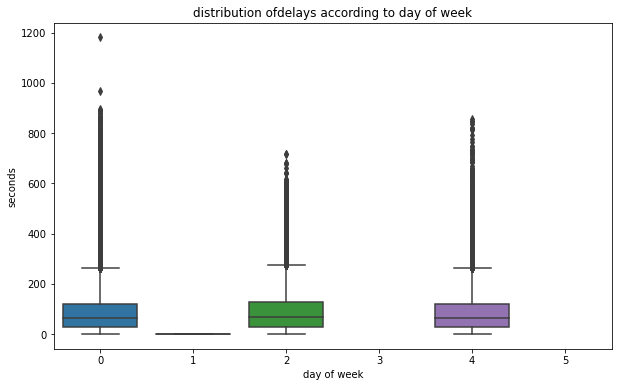

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='weekday', y='delay_sec', data=df);
plt.title('distribution of delays according to day of week');
plt.xlabel('day of week');
plt.ylabel('seconds');

In [15]:
df[~df['delay'].isnull()]['weekday'].value_counts()

0    91719
2    44210
4    40055
1        2
Name: weekday, dtype: int64

In [19]:
df[df['delay'].isnull()]['weekday'].value_counts()

1    88893
3    43270
5        3
Name: weekday, dtype: int64

##### It appears that train set and test set are split on day of week. 

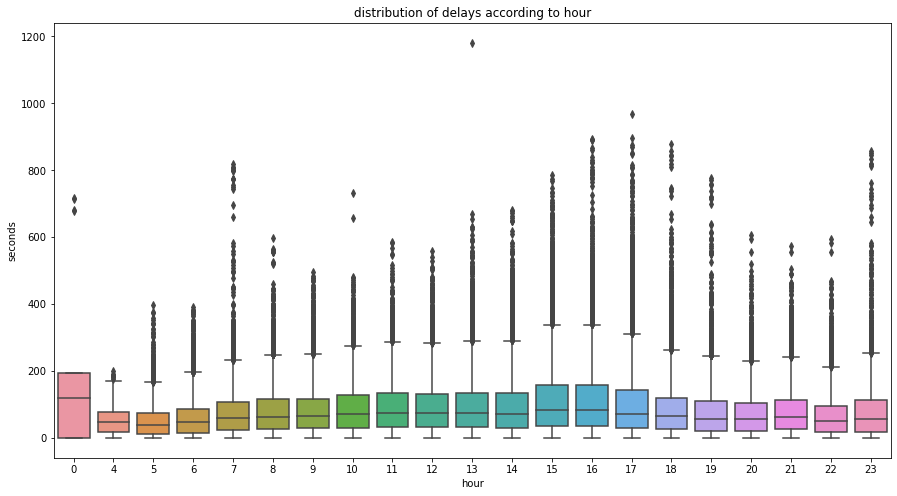

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x='hour', y='delay_sec', data=df);
plt.title('distribution of delays according to hour');
plt.ylabel('seconds');

In [7]:
# group hours into: rush_hours -3 , normal -2 , no_traffic -1
def day_time(x):
    if x>14 and x<18:
        return 3
    elif x>0 and x<7:
        return 1
    return 2
df['day_time'] = df['hour'].map(day_time)

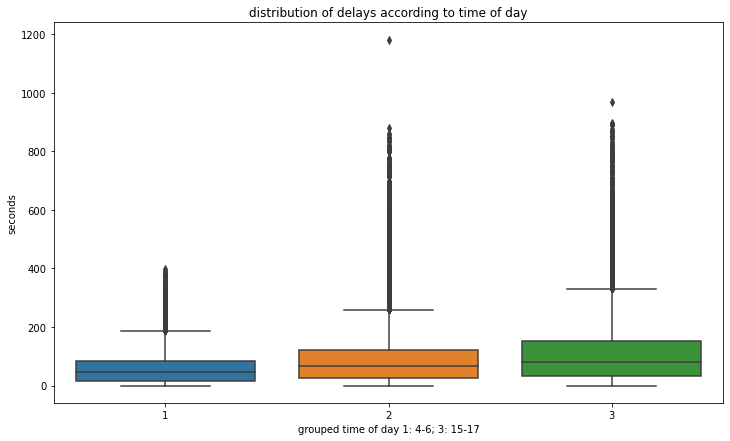

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x='day_time', y='delay_sec', data=df);
plt.title('distribution of delays according to time of day');
plt.ylabel('seconds');
plt.xlabel('grouped time of day 1: 4-6; 3: 15-17');

In [32]:
df[df['delay']>800]

,id,delay,datetime,stop,stop_name,number,direction,planned_time,vehicle_id,trip_id,seq_num,delay_min,delay_sec,hour,h_m,weekday,day_time
20704,20704,1140.0,2018-07-23 13:22:41,3036,Szpital Narutowicza,5,Krowodrza Górka,2018-07-23 13:03:00,6.352185e+18,6351558574044494090,24.0,19.0,1181.0,13,13:03,0,2
29380,29380,840.0,2018-07-23 16:18:53,1049,Głowackiego,14,Bronowice Małe,2018-07-23 16:04:00,6.352185e+18,6351558574044760328,34.0,14.0,893.0,16,16:04,0,3
29619,29619,840.0,2018-07-23 16:23:19,136,Bronowice Wiadukt,14,Bronowice Małe,2018-07-23 16:09:00,6.352185e+18,6351558574044760328,37.0,14.0,859.0,16,16:09,0,3
31782,31782,840.0,2018-07-23 17:05:01,369,Ofiar Dąbia,14,Mistrzejowice,2018-07-23 16:51:00,6.352185e+18,6351558574044760329,20.0,14.0,841.0,16,16:51,0,3
32008,32008,840.0,2018-07-23 17:09:26,2871,TAURON Arena Kraków Al. Pokoju,14,Mistrzejowice,2018-07-23 16:55:00,6.352185e+18,6351558574044760329,23.0,14.0,866.0,16,16:55,0,3
32124,32124,840.0,2018-07-23 17:11:49,930,M1 Al. Pokoju,14,Mistrzejowice,2018-07-23 16:57:00,6.352185e+18,6351558574044760329,24.0,14.0,889.0,16,16:57,0,3
32232,32232,840.0,2018-07-23 17:13:49,3041,Rondo 308. Dywizjonu,14,Mistrzejowice,2018-07-23 16:59:00,6.352185e+18,6351558574044760329,25.0,14.0,889.0,16,16:59,0,3
32374,32374,960.0,2018-07-23 17:16:09,409,Centralna,14,Mistrzejowice,2018-07-23 17:00:00,6.352185e+18,6351558574044760329,26.0,16.0,969.0,17,17:00,0,3
32758,32758,840.0,2018-07-23 17:23:09,2744,Plac Centralny im. R.Reagana,14,Mistrzejowice,2018-07-23 17:09:00,6.352185e+18,6351558574044760329,29.0,14.0,849.0,17,17:09,0,3
32853,32853,840.0,2018-07-23 17:24:57,418,Os.Zgody,14,Mistrzejowice,2018-07-23 17:10:00,6.352185e+18,6351558574044760329,30.0,14.0,897.0,17,17:10,0,3


In [21]:
print('Length of routes (by number of stops) for each line number:')
df.groupby(['number', 'direction'])['seq_num'].max()

Length of routes (by number of stops) for each line number:


number  direction        
1       Salwator             31.0
        Wzgórza K.           30.0
2       Cm. Rakowicki        10.0
        Salwator             11.0
3       Dworzec Tow.         20.0
        Krowodrza Górka      23.0
        Nowy Bieżanów P+R    23.0
4       Bronowice Małe       32.0
        Kombinat             26.0
        Wzgórza K.           32.0
5       Krowodrza Górka      25.0
        Wzgórza K.           25.0
6       Kurdwanów P+R        20.0
        Salwator             21.0
8       Borek Fałęcki        26.0
        Bronowice Małe       25.0
9       Mistrzejowice        35.0
        Nowy Bieżanów P+R    35.0
10      Kopiec Wandy         26.0
        Łagiewniki           27.0
11      Czerwone Maki P+R    21.0
        Mały Płaszów         21.0
13      Bronowice            27.0
        Nowy Bieżanów P+R    27.0
14      Bronowice Małe       37.0
        Mistrzejowice        37.0
16      Kopiec Wandy         13.0
        Mistrzejowice        14.0
18      Czerwone Maki 

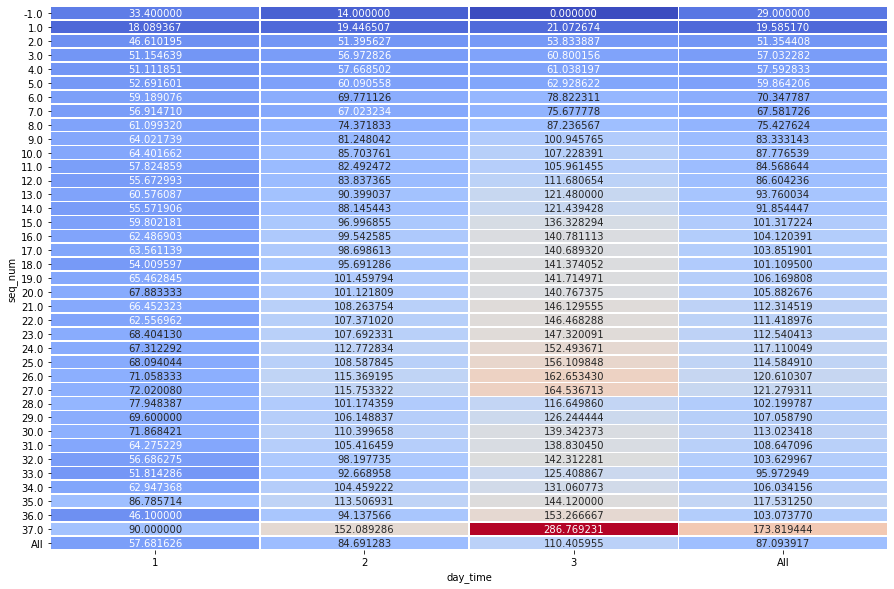

In [22]:
pt= df.pivot_table(values='delay_sec', index='seq_num',columns='day_time', aggfunc=np.mean, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=True, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

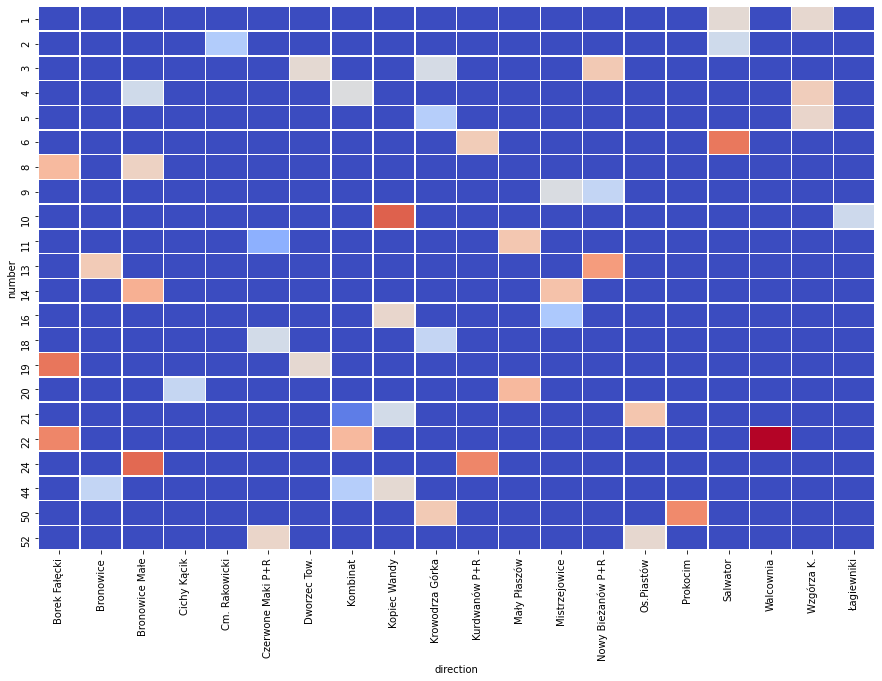

In [35]:
pt= df.pivot_table(values='delay_sec', index='number',columns='direction', aggfunc=np.mean, fill_value=0, margins=False)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=False, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

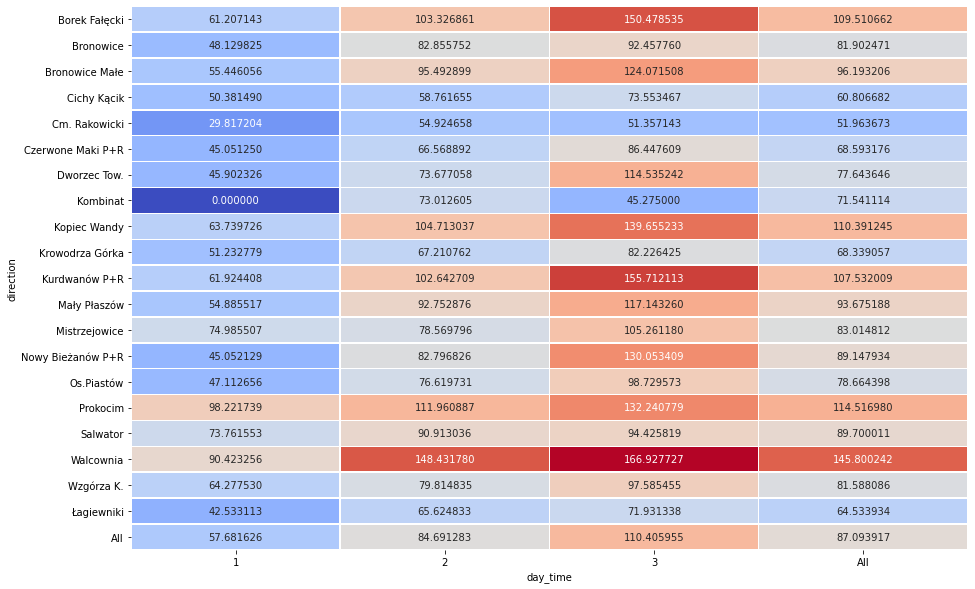

In [38]:
pt= df.pivot_table(values='delay_sec', index='direction',columns='day_time', aggfunc=np.mean, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=True, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

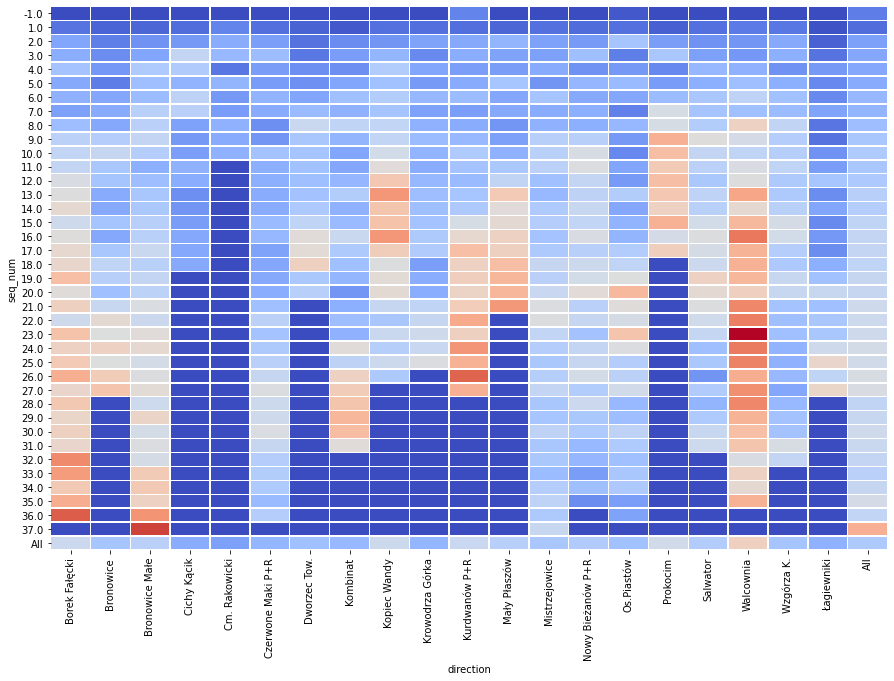

In [23]:
pt= df.pivot_table(values='delay_sec', index='seq_num',columns='direction', aggfunc=np.mean, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=False, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

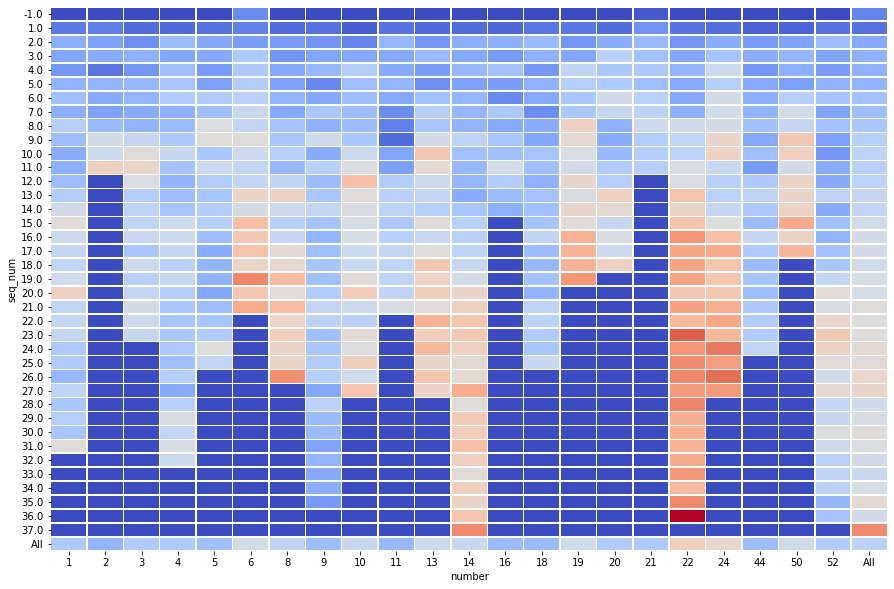

In [24]:
pt= df.pivot_table(values='delay_sec', index='seq_num',columns='number', aggfunc=np.mean, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=False, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

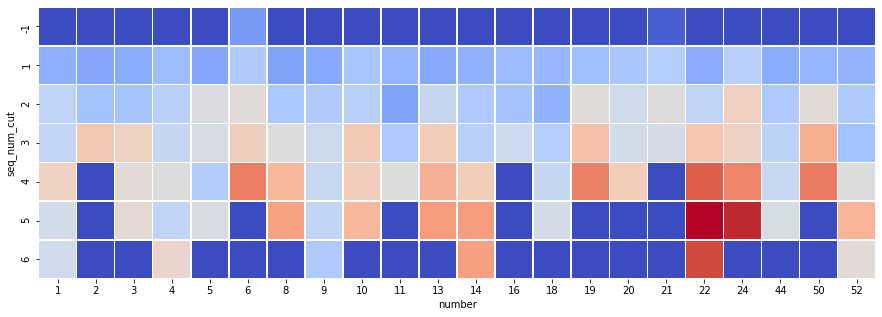

In [10]:
cut_labels = [-1, 1, 2, 3, 4, 5, 6]
cut_bins = [-2, 0, 5, 8, 14, 22, 27, 37]
df['seq_num_cut'] = pd.cut(df['seq_num'], bins=cut_bins, labels=cut_labels)
pt= df.pivot_table(values='delay_sec', index='seq_num_cut',columns='number', aggfunc=np.mean, fill_value=0, margins=False)
plt.rcParams['figure.figsize']=(15,5)
sns.heatmap(pt, annot=False, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

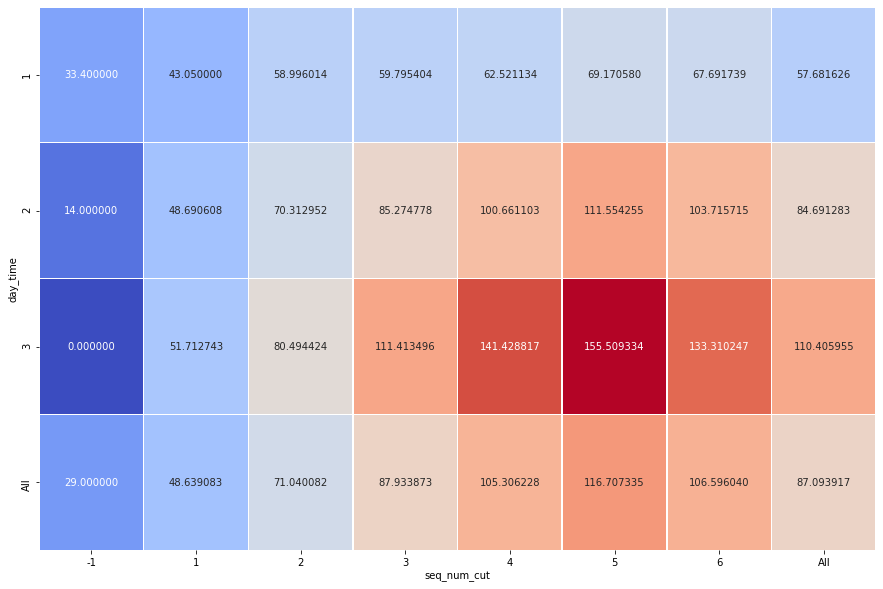

In [26]:
pt= df.pivot_table(values='delay_sec', index='day_time',columns='seq_num_cut', aggfunc=np.mean, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=True, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

In [11]:
def group_stops(grp):
    avg = grp['delay'].mean()
    if avg < 20:
        grp['stop_group'] = 1
    elif avg < 40:
        grp['stop_group'] = 2
    elif avg < 60:
        grp['stop_group'] = 3
    elif avg < 80:
        grp['stop_group'] = 4
    else:
        grp['stop_group'] = 5
    return grp

df = df.groupby('stop_name').apply(group_stops)

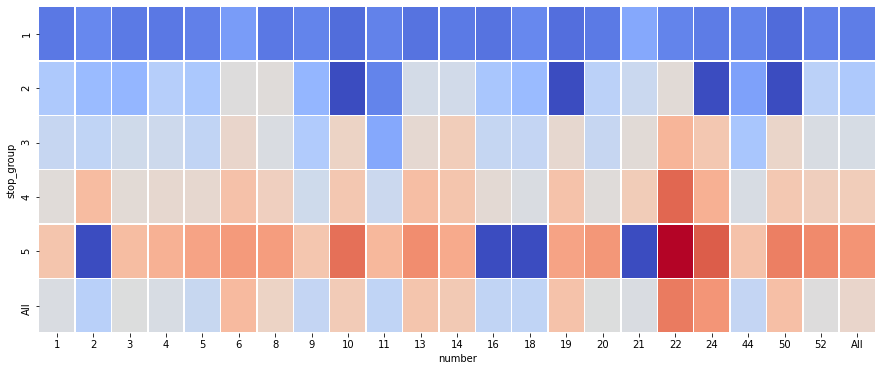

In [27]:
pt= df.pivot_table(values='delay_sec', index='stop_group',columns='number', aggfunc=np.mean, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,6)
sns.heatmap(pt, annot=False, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

In [19]:
df_gr = df.groupby(['stop_group', 'day_time', 'seq_num_cut'])['delay_sec'].agg(['mean', 'median', 'count', lambda x: len([i for i in x if i < 60])]).round(1).sort_values(by='mean', ascending=False)
df_gr.columns = ['mean', 'median', 'count', 'count_0']
df_gr['prob_0'] = np.round(df_gr['count_0'] / df_gr['count'], 2)
df_gr.head(25)

mean  median  count  count_0  prob_0
stop_group day_time seq_num_cut                                       
5          3        5            220.9   182.0    605     87.0    0.14
                    4            179.5   152.0   2529    374.0    0.15
4          3        5            162.8   136.0   1449    320.0    0.22
5          3        6            161.9   139.5     94     21.0    0.22
4          3        6            160.7   135.5    518    128.0    0.25
5          2        5            150.1   127.0   2395    483.0    0.20
                    6            147.2   117.0    416     99.0    0.24
4          3        4            140.5   115.0   3417    911.0    0.27
5          3        3            133.0   115.0   2426    558.0    0.23
           2        4            132.8   115.0   9185   1977.0    0.22
3          3        5            132.3   110.0   1131    367.0    0.32
4          2        6            126.9   101.0   2208    722.0    0.33
3          3        6            126.1    94.5    994    361.0    0.36
4          2        5            121.8   102.0   5534   1689.0    0.31
3          3        4            117.4    93.0   2853   1020.0    0.36
5          3        2            115.9   104.0    784    178.0    0.23
2          3        6            113.9    73.5    502    224.0    0.45
4          3        3            109.3    83.0   3584   1317.0    0.37
5          2        3            109.1    99.0   8857   2425.0    0.27
4          2        4             99.8    83.0  12155   4588.0    0.38
5          2        2             99.7    91.0   2830    732.0    0.26
           1        6             98.8    96.0     44     16.0    0.36
3          2        6             98.3    76.0   3899   1695.0    0.43
2          3        5             96.4    61.5    404    200.0    0.50
3          2        5             95.9    74.0   4324   1852.0    0.43

In [20]:
df.groupby(['stop_name', 'hour', 'number', 'direction'])['delay_sec'].agg(['mean', 'count', lambda x: len([i for i in x if i < 60])]).sort_values(by='mean', ascending=False).head(30)

,,,,mean,count,<lambda_0>
stop_name,hour,number,direction,,,
Os.Zgody,17,14,Mistrzejowice,897.000000,1,0.0
Plac Centralny im. R.Reagana,17,14,Mistrzejowice,849.000000,1,0.0
Czyżyny,0,10,Kopiec Wandy,718.000000,1,0.0
Łagiewniki ZUS,23,22,Borek Fałęcki,695.000000,1,0.0
Rondo Czyżyńskie,0,10,Kopiec Wandy,680.000000,1,0.0
Agencja Kraków Wschód,18,22,Walcownia,612.000000,1,0.0
Muzeum Lotnictwa,23,5,Wzgórza K.,583.000000,1,0.0
Cystersów,23,5,Wzgórza K.,548.000000,1,0.0
Fabryczna,23,22,Borek Fałęcki,489.000000,1,0.0
